# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
# Mounting the Google drive

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Changing working directory to the location that contains data files

%cd /content/drive/MyDrive/2. Elective Project/Elective Project: Deep Learning/

/content/drive/MyDrive/2. Elective Project/Elective Project: Deep Learning


## **Importing the necessary libraries**

In [ ]:
# Importing the required libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, LeakyReLU, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

**Let us check the version of tensorflow.**

In [ ]:
# Checking tensorflow version

print(tf. __version__)

2.15.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
# Loading the dataset in read-only mode

svhn = h5py.File('SVHN_single_grey1.h5', 'r')

In [ ]:
# Splitting the data and labels into train and test

X_train = svhn['X_train'][:]

y_train = svhn['y_train'][:]

X_test = svhn['X_test'][:]

y_test = svhn['y_test'][:]

Check the number of images in the training and the testing dataset.

In [ ]:
# Checking the number of images in the training and the testing dataset

print('The training dataset contains %d images.' % len(X_train))
print('The testing dataset contains %d images.' % len(X_test))

The training dataset contains 42000 images.
The testing dataset contains 18000 images.


**Observation:**
There are 42000 images in the training dataset and 18000 images in the test dataset, which corresponds to 70%:30% split.



## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use y_train to print the first 10 labels.

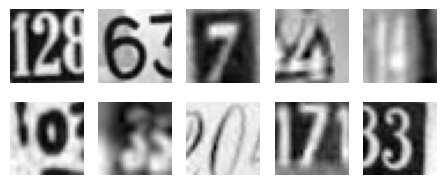

Labels corresponding to each of the images above:
Top row: [2 6 7 4 4]
Bottom row: [0 3 0 7 3]


In [ ]:
# Visualizing the first 10 images in X_train dataset

plt.figure(figsize = (5.5, 2.2))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap = "gray")
    plt.axis('off')

plt.show()


# Printing the first 10 labels in y_train

print('Labels corresponding to each of the images above:')
print('Top row: %s' % (y_train[0:5]))
print('Bottom row: %s' % (y_train[5:10]))


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Printing the shape for the first image in the training dataset

print('The shape of the array of pixels for the first image is:')
X_train[0].shape

The shape of the array of pixels for the first image is:


(32, 32)

In [ ]:
# Printing the array of pixels for the first image in the training dataset

print('The array of pixels for the first image is:')
print(X_train[0])

The array of pixels for the first image is:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Flattening the array into a vector

X_train_1D = X_train.reshape(X_train.shape[0], 1024)
X_test_1D = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [ ]:
# Normalizing the train and the test dataset by dividing by 255

X_train_1D_norm = X_train_1D.astype('float32') / 255
X_test_1D_norm = X_test_1D.astype('float32') / 255

Print the shapes of Training and Test data

In [ ]:
# Printing the shape of the flattened and normalized train and test arrays

print('The shape of the flattened normalized array for the training dataset is:')
print(X_train_1D_norm.shape)
print()
print('The shape of the flattened normalized array for the test dataset is:')
print(X_test_1D_norm.shape)

The shape of the flattened normalized array for the training dataset is:
(42000, 1024)

The shape of the flattened normalized array for the test dataset is:
(18000, 1024)


### **One-hot encode output**

In [ ]:
# Encode vectors for train and test classes to binary class matrix

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# Printing one-hot encoded labels for the y_train set
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
Image classes (categorical variables) have been encoded into a numerical format e.i. class assigned to each image is represented as a vector of zeros and one, instead of a single categorical label, one representing the assigned true label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators

import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
# Intializing a sequential model
def nn_model_1():

    model = Sequential()

    # Adding first hidden layer with 64 nodes and the relu activation and the input shape = (1024, )
    model.add(Dense(64, activation='relu', input_shape=(1024,)))

    # Adding second hidden layer with 32 nodes and the relu activation
    model.add(Dense(32, activation='relu'))

    # Adding an output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
    model.add(Dense(10, activation='softmax'))

    # Compiling the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Calling the nn_model_1 function and storing the model in a new variable
model1 = nn_model_1()

# Printing the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fitting the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20
# Storing the model building history to use later for visualization
history_model1 = model1.fit(X_train_1D_norm, y_train, validation_split=0.2, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
263/263 [==============================] - 2s 4ms/step - loss: 2.3002 - accuracy: 0.1159 - val_loss: 2.2677 - val_accuracy: 0.1632
Epoch 2/20
263/263 [==============================] - 1s 3ms/step - loss: 2.1662 - accuracy: 0.2041 - val_loss: 2.0418 - val_accuracy: 0.2729
Epoch 3/20
263/263 [==============================] - 1s 3ms/step - loss: 1.8570 - accuracy: 0.3546 - val_loss: 1.6774 - val_accuracy: 0.4438
Epoch 4/20
263/263 [==============================] - 1s 3ms/step - loss: 1.5812 - accuracy: 0.4741 - val_loss: 1.4876 - val_accuracy: 0.5174
Epoch 5/20
263/263 [==============================] - 1s 3ms/step - loss: 1.4484 - accuracy: 0.5282 - val_loss: 1.4190 - val_accuracy: 0.5329
Epoch 6/20
263/263 [==============================] - 1s 3ms/step - loss: 1.3748 - accuracy: 0.5555 - val_loss: 1.3582 - val_accuracy: 0.5563
Epoch 7/20
263/263 [==============================] - 1s 3ms/step - loss: 1.3219 - accuracy: 0.5780 - val_loss: 1.2999 - val_accuracy: 0.5930
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

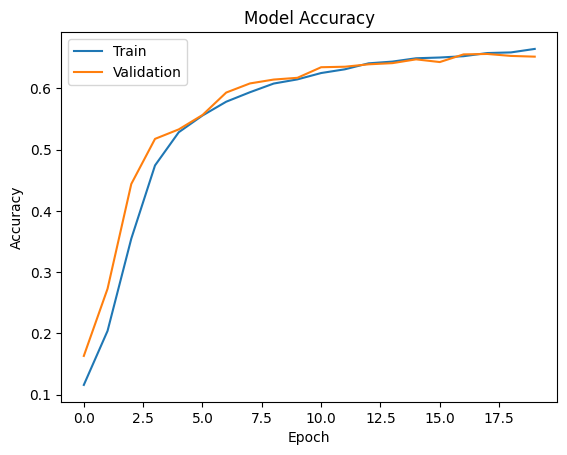

In [ ]:
# Retrieving model1 accuracy on test and validation datasets from model building history and plotting it for each epoch

plt.plot(history_model1.history['accuracy'])

plt.plot(history_model1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Displaying the model accuracy plot
plt.show()


**Observations:**
ANN model 1 is a fairly simple model with 68,010 total number of trainable parameters. Accuracy plot for model 1 shows that the model is learning effectively (steep incline in accuracy) during the first ~6 epochs, afterwards, the model is still learning but at a much slower rate (accuracy is close to reaching plateau). Curves for train and validation datasets are almost overlapping, which indicates that the model can generalize well and is not overfitting. The final accuracies for train and validation datasets are ~66% and ~65% respectively, which indicates moderate accuracy. Hyperparameter tuning, different ANN architecture or application of CNN might be tried to improve accuracy of predictions.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()


# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
def nn_model_2():
    model = Sequential()

    # Adding first hidden layer with 256 nodes and the relu activation and the input shape = (1024, )
    model.add(Dense(256, activation='relu', input_shape=(1024,)))

    # Adding second hidden layer with 128 nodes and the relu activation
    model.add(Dense(128, activation='relu'))

    # Adding the Dropout layer with the rate equal to 0.2
    model.add(Dropout(0.2))

    # Adding third hidden layer with 64 nodes and the relu activation
    model.add(Dense(64, activation='relu'))

    # Adding fourth hidden layer with 64 nodes and the relu activation
    model.add(Dense(64, activation='relu'))

    # Adding fifth hidden layer with 32 nodes and the relu activation
    model.add(Dense(32, activation='relu'))

    # Adding the BatchNormalization layer
    model.add(BatchNormalization())

    # Adding the output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
    model.add(Dense(10, activation='softmax'))

    # Compiling the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Calling the nn_model_2 function and storing the model in a new variable
model2 = nn_model_2()

# Printing the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [ ]:
# Fitting the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30
# Storing the model building history to use later for visualization
history_model2 = model2.fit(X_train_1D_norm, y_train, validation_split=0.2, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
263/263 [==============================] - 3s 7ms/step - loss: 2.3300 - accuracy: 0.1007 - val_loss: 2.3138 - val_accuracy: 0.0967
Epoch 2/30
263/263 [==============================] - 2s 6ms/step - loss: 2.3042 - accuracy: 0.1028 - val_loss: 2.3015 - val_accuracy: 0.1100
Epoch 3/30
263/263 [==============================] - 2s 6ms/step - loss: 2.1358 - accuracy: 0.1969 - val_loss: 2.0217 - val_accuracy: 0.2613
Epoch 4/30
263/263 [==============================] - 2s 6ms/step - loss: 1.5850 - accuracy: 0.4476 - val_loss: 1.4189 - val_accuracy: 0.5451
Epoch 5/30
263/263 [==============================] - 2s 6ms/step - loss: 1.3399 - accuracy: 0.5476 - val_loss: 1.2417 - val_accuracy: 0.6050
Epoch 6/30
263/263 [==============================] - 2s 6ms/step - loss: 1.2136 - accuracy: 0.6038 - val_loss: 1.1129 - val_accuracy: 0.6394
Epoch 7/30
263/263 [==============================] - 2s 6ms/step - loss: 1.1553 - accuracy: 0.6257 - val_loss: 1.0903 - val_accuracy: 0.6500
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

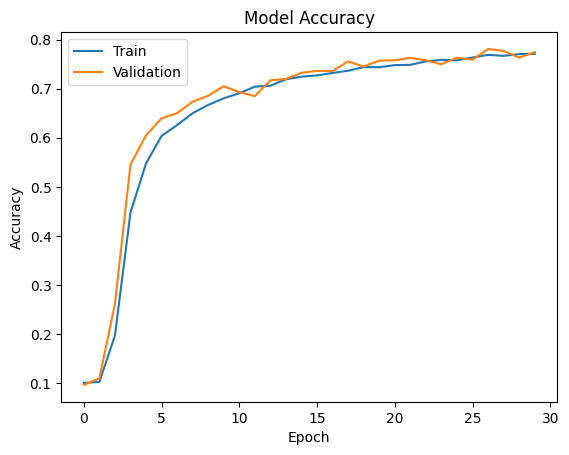

In [ ]:
# Retrieving model2 accuracy on test and validation datasets from model building history and plotting it for each epoch

plt.plot(history_model2.history['accuracy'])

plt.plot(history_model2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()


**Observations:**
ANN model 2 is a more complex model, with more complex architecture (inc. dropout and batch normalization layers) and 310,186 total number of trainable parameters. Accuracy plot for model 2 shows that the model is learning effectively (steep incline in accuracy) during the first ~10 epochs, afterwards, the model is still learning but at a much slower rate (accuracy is close to reaching plateau). Curves for train and validation datasets are almost overlapping, which indicates that the model can generalize well and is not overfitting. The final accuracy for train and validation datasets is ~77%, which indicates a pretty good accuracy, so it might be worthwhile to make predictions on the test dataset and see where the model makes most mistakes. To see whether we can achieve higher accuracy it might be worth trying different CNN architectures.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# Making predictions on the test set using model2

predictions_test = model2.predict(X_test_1D_norm)
predicted_classes_test = np.argmax(predictions_test, axis=-1)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry from one-hot encoded vector to a single label
y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1814
           1       0.76      0.83      0.79      1828
           2       0.76      0.82      0.79      1803
           3       0.77      0.72      0.74      1719
           4       0.82      0.83      0.82      1812
           5       0.74      0.76      0.75      1768
           6       0.75      0.81      0.78      1832
           7       0.86      0.78      0.82      1808
           8       0.75      0.71      0.73      1812
           9       0.72      0.76      0.74      1804

    accuracy                           0.78     18000
   macro avg       0.78      0.78      0.78     18000
weighted avg       0.78      0.78      0.78     18000



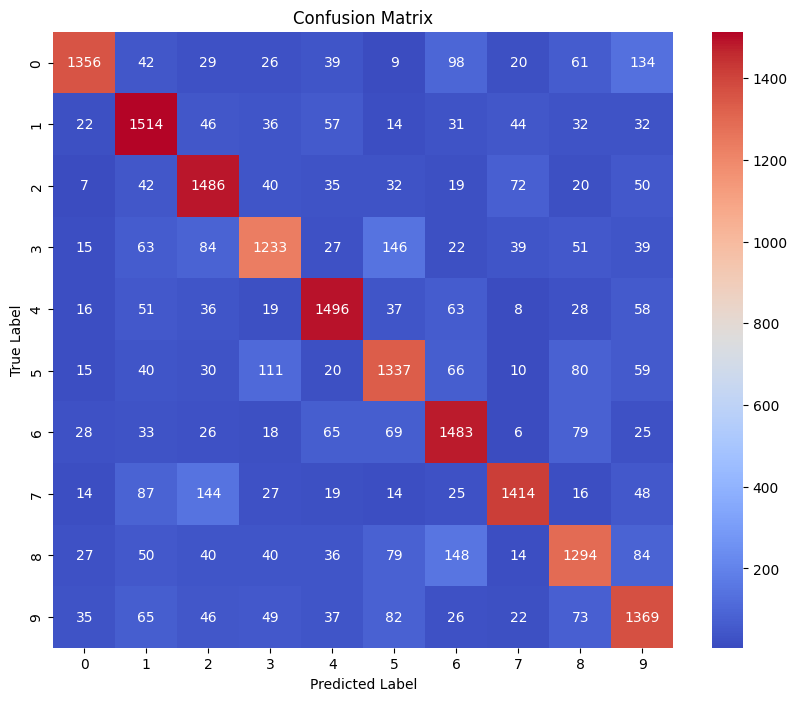

In [ ]:
# Printing classification report
print("Classification Report:")
print(classification_report(y_test, predicted_classes_test))

# Computing confusion matrix
cm = confusion_matrix(y_test, predicted_classes_test)

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Final Observations:**
Overall, ANN model 2 achieved 78% accuracy of prediction on test data. The lowest precision of prediction was observed for number 9 (with 0 being most frequently misclassified as 9). The lowest recall was observed for number 8 (most frequently misclassified as 6). Overall, the best performance was observed with classification of numbers 4 and 7 (f1-score 0.82), and the worst with number 8 (f1-score 0.73).

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Loading the dataset
svhn = h5py.File('SVHN_single_grey1.h5', 'r')

# Splitting the dataset into train and test
X_train = svhn['X_train'][:]

y_train = svhn['y_train'][:]

X_test = svhn['X_test'][:]

y_test = svhn['y_test'][:]

Check the number of images in the training and the testing dataset.

In [ ]:
# Checking the number of images in the training and the testing dataset
print('The training dataset contains %d images.' % len(X_train))
print('The testing dataset contains %d images.' % len(X_test))

The training dataset contains 42000 images.
The testing dataset contains 18000 images.


**Observation:**
There are 42000 images in the training dataset and 18000 images in the test dataset, which corresponds to 70%:30% split.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Printing the shape of the array of pixels for the first image in the training dataset
print('The shape of the array of pixels for the first image is:')
X_train[0].shape

The shape of the array of pixels for the first image is:


(32, 32)

In [ ]:
# Printing the array of pixels for the first image in the training dataset
print('The array of pixels for the first image is:')
print(X_train[0])

The array of pixels for the first image is:
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshaping the train and test datasets into a 4D input array
X_train_4D = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test_4D = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalizing the train and test 4D arrays
X_train_4D_norm = X_train_4D.astype('float32') / 255
X_test_4D_norm = X_test_4D.astype('float32') / 255

Print New shape of Training and Test

In [ ]:
# Printing the new shape of the training and test arrays
print('The shape of the re-shaped and normalized array for the training dataset is:')
print(X_train_4D_norm.shape)
print()
print('The shape of the re-shaped and normalized array for the test dataset is:')
print(X_test_4D_norm.shape)

The shape of the re-shaped and normalized array for the training dataset is:
(42000, 32, 32, 1)

The shape of the re-shaped and normalized array for the test dataset is:
(18000, 32, 32, 1)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# Encode vectors for train and test classes to binary class matrix
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# Printing one-hot encoded labels for the y_train set
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
Image classes (categorical variables) have been encoded into a numerical format e.i. class assigned to each image is represented as a vector of zeros and one, instead of a single categorical label, one representing the assigned true label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_model_1():
    model = Sequential()

    # Adding first Convolutional layer with 16 filters and the kernel size of 3x3. Use the 'same' padding and provide the input shape = (32, 32, 1)
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    # Adding a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))
    # Adding a second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
    model.add(Conv2D(32, (3, 3), padding='same'))
    # Adding another LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))
    # Adding a max-pooling layer with a pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flattening the output from the previous layer
    model.add(Flatten())
    # Adding a dense layer with 32 nodes
    model.add(Dense(32))
    # Adding a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))
    # Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
    model.add(Dense(10, activation='softmax'))

    #Compiling the model with the loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Calling the cnn_model_1 function and storing the model in a new variable
model3 = cnn_model_1()

# Printing the summary of the model
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

In [ ]:
# Fitting the model on the train data with a validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20
# Storing the model building history to use later for visualization
history_model3 = model3.fit(X_train_4D_norm, y_train, validation_split=0.2, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1050/1050 [==============================] - 12s 10ms/step - loss: 1.1555 - accuracy: 0.6191 - val_loss: 0.6579 - val_accuracy: 0.8081
Epoch 2/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.5451 - accuracy: 0.8427 - val_loss: 0.5267 - val_accuracy: 0.8487
Epoch 3/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.4471 - accuracy: 0.8662 - val_loss: 0.5124 - val_accuracy: 0.8564
Epoch 4/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.3852 - accuracy: 0.8876 - val_loss: 0.4420 - val_accuracy: 0.8763
Epoch 5/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.3387 - accuracy: 0.8985 - val_loss: 0.4694 - val_accuracy: 0.8718
Epoch 6/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.2981 - accuracy: 0.9102 - val_loss: 0.4755 - val_accuracy: 0.8708
Epoch 7/20
1050/1050 [==============================] - 10s 9ms/step - loss: 0.2677 - accuracy: 0.9190 - val_loss: 0.4696 - val

### **Plot the Training and Validation Accuracies and Write your observations.**

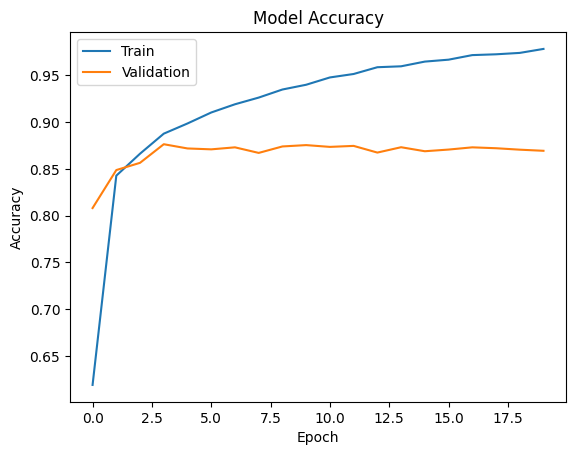

In [ ]:
# Retrieving model3 accuracy on test and validation datasets from model building history and plotting it for each epoch

plt.plot(history_model3.history['accuracy'])

plt.plot(history_model3.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()


**Observations:**
Model 3 is a CNN model with 267,306 total trainable parameters. The model accuracy increases rapidly, reaching >90% by epoch 6, and quickly plateaus, reaching 99% final accuracy on train dataset. That indicates that the model is learning the patterns in the training dataset exceptionally well. However, the model does not perform eqally well on the validation dataset, achieving 87% final accuracy (12% difference in accuracy between train and validation). This difference might indicate that the model is overfitting to training dataset and cannot generalize well to make prediction on unseen data. A solution to this problem might be trying a less complex architecture,  implementing regulatization measures, or early stopping.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()


# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
input_shape=(32, 32, 1)
num_classes=10

def cnn_model_2():
    model = Sequential()

    # Adding first Convolutional layer with 16 filters and the kernel size of 3x3. Using the 'same' padding and provide the input shape = (32, 32, 1)
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=input_shape))
    # Adding a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))
    # Adding second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
    model.add(Conv2D(32, (3, 3), padding='same'))
    # Adding a LeakyRelu with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))
    # Adding a max-pooling layer with a pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Adding a BatchNormalization layer
    model.add(BatchNormalization())
    # Adding third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
    model.add(Conv2D(32, (3, 3), padding='same'))
    # Adding a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))
    # Adding fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding
    model.add(Conv2D(64, (3, 3), padding='same'))
    # Adding a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))
    # Adding a max-pooling layer with a pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Adding a BatchNormalization layer
    model.add(BatchNormalization())
    # Flattening the output from the previous layer
    model.add(Flatten())
    # Adding a dense layer with 32 nodes
    model.add(Dense(32))
    # Adding a LeakyRelu layer with the slope equal to 0.1
    model.add(LeakyReLU(alpha=0.1))
    # Adding a dropout layer with the rate equal to 0.5
    model.add(Dropout(0.5))
    # Adding the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
    model.add(Dense(num_classes, activation='softmax'))

    #Compiling the model with the categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Calling the nn_model_2 function and storing the model in a new variable
model4 = cnn_model_2()

# Printing the summary of the model
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [ ]:
# Fitting the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30
# Storing the model building history to use later for visualization
history_model4 = model4.fit(X_train_4D_norm, y_train, validation_split=0.2, batch_size=128, epochs=30, verbose=1)

Epoch 1/30
263/263 [==============================] - 12s 39ms/step - loss: 1.3334 - accuracy: 0.5471 - val_loss: 1.9303 - val_accuracy: 0.2900
Epoch 2/30
263/263 [==============================] - 10s 36ms/step - loss: 0.6702 - accuracy: 0.7922 - val_loss: 0.7119 - val_accuracy: 0.7931
Epoch 3/30
263/263 [==============================] - 9s 36ms/step - loss: 0.5495 - accuracy: 0.8331 - val_loss: 0.5506 - val_accuracy: 0.8401
Epoch 4/30
263/263 [==============================] - 10s 36ms/step - loss: 0.4921 - accuracy: 0.8494 - val_loss: 0.3968 - val_accuracy: 0.8835
Epoch 5/30
263/263 [==============================] - 9s 36ms/step - loss: 0.4401 - accuracy: 0.8635 - val_loss: 0.3707 - val_accuracy: 0.8964
Epoch 6/30
263/263 [==============================] - 10s 36ms/step - loss: 0.4014 - accuracy: 0.8758 - val_loss: 0.3718 - val_accuracy: 0.8949
Epoch 7/30
263/263 [==============================] - 9s 36ms/step - loss: 0.3801 - accuracy: 0.8832 - val_loss: 0.4166 - val_accuracy: 0.

### **Plot the Training and Validation accuracies and write your observations.**

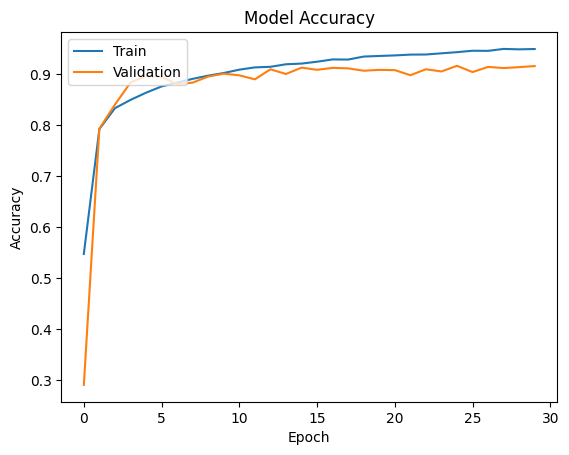

In [ ]:
# Retrieving model4 accuracy on test and validation datasets from model building history and plotting it for each epoch
plt.plot(history_model4.history['accuracy'])

plt.plot(history_model4.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

**Observations:**
Model 4 is a CNN model with a complex architecture and 164,170 total trainable parameters (fewer than CNN model 3). In comparison to model 3, which does not include explicit regularization techniques, model 2 includes BatchNormalization and Dropout, which help in regularizing the model and fix the problem of overfitting. Performance of model 4 is similar on training and validation datasets, achieving 95% and 92% accuracy, respectively. On both train and validation datasets, the accuracy steeply increases during the first ~5 epochs, after which it stabilizes and approaches plateau. Early stopping might be implemented to reduce computational cost.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Making predictions on the test dataset using model4
predictions_cnn_test = model4.predict(X_test_4D_norm)
predicted_classes_cnn_test = np.argmax(predictions_cnn_test, axis=-1)

563/563 [==============================] - 3s 5ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting one-hot encoded vector into single labels
y_test = np.argmax(y_test, axis = -1)

In [ ]:
# Printing classification report
print("Classification Report:")
print(classification_report(y_test, predicted_classes_cnn_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.92      0.91      0.92      1828
           2       0.93      0.92      0.92      1803
           3       0.90      0.89      0.89      1719
           4       0.93      0.94      0.93      1812
           5       0.91      0.91      0.91      1768
           6       0.92      0.89      0.90      1832
           7       0.93      0.93      0.93      1808
           8       0.90      0.90      0.90      1812
           9       0.91      0.91      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.92      0.91      0.91     18000



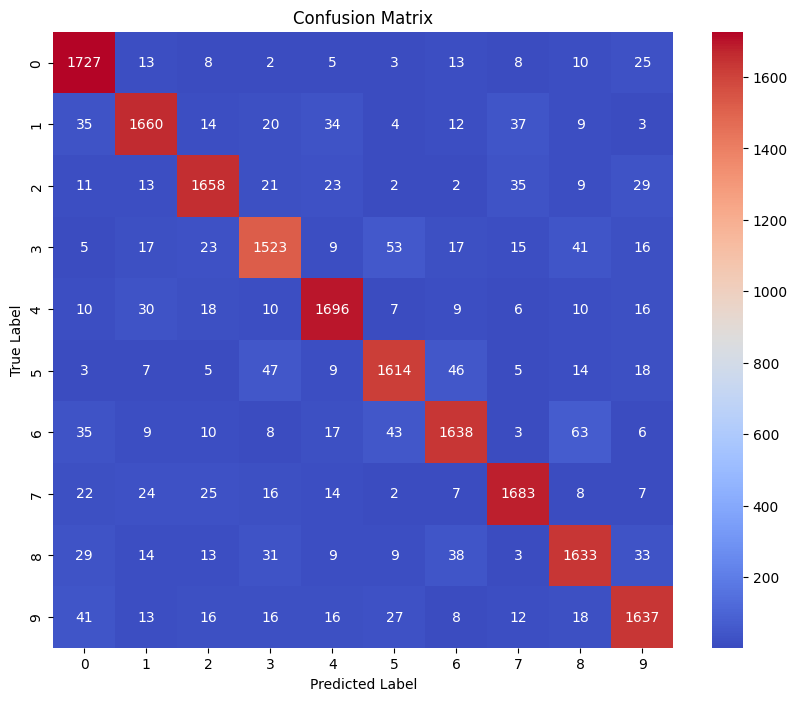

In [ ]:
# Computing confusion matrix
cm = confusion_matrix(y_test, predicted_classes_cnn_test)

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Observations:** The final model performs very well on test data, achieving 91% overall accuracy of classification. High accuracy (>=90%) and recall (>= 89%) is achieved for all digits. The lowest f1-score is observed for digit 6, although it's still a pretty high value (0.89). Overall, misclassification is more balanced, with no striking examples of misclassification patterns.

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**
Overall, CNN models performed better than ANN in digit recognition from images. The highest performance was observed for the final model, which featured a complex architecture and multiple regularization methods to minimize overfitting.
CNN architecture is more suitable for classification of numbers from images, since it is good at capturing local patterns in the data, e.g. edges, and in deeper layers more complex features such as shapes. Moreover, pooling layers allow object classification irrespective of its position or orientation within an image, which is important given the data originates from satellite captured images of street signs. Another advantiage is that CNNs can share parameter through convolutional filters, which reduces the number of parameters (e.g. CNN model4 used fewer parameters and achieves higher accuracy than ANN model2).